## Loading the DataSets from Scikit-learn Module and study them

In [ ]:
# from sklearn import datasets #Imported the datasets from the scikit-learn
from sklearn.datasets import fetch_openml
#since the boston-dataset is deprived from the dataset, so we are using California-housingDataset

In [238]:
# data = datasets.load_boston() #This function will load the boston-datasets into the dataset variable
# type(data)
housing = fetch_openml(name="house_prices", as_frame=True)
type(housing)    

sklearn.utils._bunch.Bunch

In [227]:
housing #run to see , what is in the housing variable
X = housing.data # Input features
Y = housing.target # Output Target
Y_encoded = pd.get_dummies(Y)


In [97]:
X # {training datasets- sets with labels}
type(X) #pandas.core.frame.DataFrame
X.shape #(1460,80)=Means it have 1460 data-points and each datapoints have 80 features
# .shape gives the exact shape wrt to rows and coloumns , whereas size gives the total size means rowsxcoloumns

(1460, 80)

In [222]:
import pandas as pd
pd.DataFrame(X) #converted into data-frame
#kabhi-kabhi dadatset, array(numpy) ke formate mai hota hai usko sets(inptu,output) mai krne ke liye hme yeh uper wala pandas waala code use krte hai
#But yaha pr hmara X and Y already sets(input,output) ke form mai tha tho uper wala code krne per bhi no change
#type(X) #pandas.core.frame.DataFrame, already pandas-implemented sets form mai hai yeh X, 
df=pd.DataFrame(X) #stored input-feature into a var
print(housing.feature_names) #will print the 80 feature's name we have
#In some cases they are not listed on the coloumn's names rather stored in array , instead numbers are printed obviously this would be take place when dataset comes (array)numpy form by-default, so you can change them by below process{But here they are already listed as coloumn's name}
# df.coloumns = housing.feature_names
df.describe() #This is used to describe all the specially(rows) and coloumns heading ek-saath 
X.describe() #Hence hmko dataset pandas implemented waala hi milatha so, waha colomnsby-default the, else numpy(array) waala milta jaha yeh headdings kisi array mai store hote and dono mai .describe use krne se rows heading aata hai
# X # Yeh dega hmko total data-points and and unke features, but .describe krdendenge toh rows heading bhi aajega jisse headings ko satisfy krne waale data points ko hi likha jaega jisse essme kam data-points dikhte hai


In [ ]:
housing.DESCR #provide us the description, gives eaxh coloumns defination

In [85]:
Y # {Examine dataset, set without labels which is to be find}
type(Y) 
Y.shape # in X there are 1460 datapoints and 80 features, and corressponding to each data-points there would be 1 ouput target means in total 1460 outputs

(1460,)

## Now begin with train an LinearRegression algo from the above dataset

### We have label dataset as X whcih contains only correspoding datapoint's features and Y contains the corresponding datapoint's ouputs , which some bigger part used for training the algo, and some smaller part used for testing the algo, as it is providing us the correct label or not

### We should split the datasets into test and train randomly , so that they should not have the anykind of relation in them

In [104]:
#scikit-learn provides a module which bifurgate the dataset into test and train
from sklearn import model_selection  #the module imported from scikit-learn
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y) #given the dataset which is needed to be divided would test and train daatsets
#bydefault they are in the sequence listed as variavle above
print(X.shape)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1460, 80)
(1095, 80) (1095,)
(365, 80) (365,)


## Now we successfully acquired the datasets, we go for the algo

In [237]:
from sklearn.linear_model import LinearRegression #from scikitLearn imported the LinearRegression model
alg01 = LinearRegression() # this var contains the algorithm-object or code, which is used to train and test

## Now we would train the algo

In [195]:
 # alg01.fit(X_train,Y_train) #Given train data to learn 
    
from sklearn.impute import SimpleImputer

# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude='number').columns

# Impute missing values in numeric columns with the mean
numeric_imputer = SimpleImputer(strategy='mean')
X_train_numeric = numeric_imputer.fit_transform(X_train.select_dtypes(include='number'))
X_train_numeric = pd.DataFrame(X_train_numeric, columns=X_train.select_dtypes(include='number').columns)

# Impute missing values in non-numeric columns with the most frequent value
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
X_train_non_numeric = non_numeric_imputer.fit_transform(X_train[non_numeric_cols])
X_train_non_numeric = pd.DataFrame(X_train_non_numeric, columns=non_numeric_cols)

# Concatenate numeric and non-numeric columns
X_train_imputed = pd.concat([X_train_numeric, X_train_non_numeric], axis=1)

X_train_encoded = pd.get_dummies(X_train_imputed)
Y_train_encoded = pd.get_dummies(Y_train)


# The above code performs data preprocessing steps to handle missing values and categorical variables before fitting the LinearRegression model. Here's a breakdown of what each section of the code does:
# Identify non-numeric columns: This step identifies the columns in the X_train dataset that contain non-numeric values.
# Impute missing values in numeric columns: The code creates a SimpleImputer object with the strategy set to 'mean' and applies it to the numeric columns in X_train using the fit_transform method. This replaces any missing values in the numeric columns with the mean value of the available data.
# Impute missing values in non-numeric columns: Similarly, a second SimpleImputer object is created with the strategy set to 'most_frequent'. It is applied to the non-numeric columns in X_train to replace any missing values with the most frequent value in each respective column.
# Concatenate numeric and non-numeric columns: The imputed numeric and non-numeric columns are concatenated using the pd.concat function to create the X_train_imputed DataFrame. This DataFrame contains the imputed values for both numeric and non-numeric columns.
# Encode categorical variables: The X_train_imputed DataFrame is then encoded using one-hot encoding with the pd.get_dummies function. This converts categorical variables into binary columns representing the presence or absence of each category.
# Encode categorical target variable: The Y_train target variable is also encoded using one-hot encoding to handle categorical target variables, if applicable.
# Fit the LinearRegression model: Finally, the LinearRegression model (alg01) is fitted using the encoded X_train_encoded and Y_train_encoded data.
# The reason for the changes in the code is to handle missing values and categorical variables appropriately. The original code did not account for missing values and directly applied one-hot encoding to the original X_train and Y_train data, which can cause errors when there are missing values or non-numeric variables present. The updated code uses SimpleImputer to fill in missing values separately for numeric and non-numeric columns, and then encodes the categorical variables using one-hot encoding. This ensures that the data is properly prepared for the LinearRegression model.

alg01.fit(X_train_encoded, Y_train_encoded)#Given train data to learn 

# So, seeing "LinearRegression()" as your output suggests that the LinearRegression model has been created and is ready to be used for further analysis or predictions.


LinearRegression()

## Now we would get the predicted output

In [230]:
# alg01.predict(X_test)

# Preprocess the test data
X_test_imputed = X_test.fillna(X_train.mean())  # Impute missing values with mean
X_test_reindexed = X_test_imputed.reindex(columns=X_train_encoded.columns, fill_value=0)  # Reindex columns
X_test_encoded = pd.get_dummies(X_test_reindexed)  # Perform one-hot encoding

# Encode the target variable
Y_test_encoded = pd.get_dummies(Y_test)

# Make predictions using the trained model
Y_pred = alg01.predict(X_test_encoded.values)

# Print the predicted values
print(Y_pred)
print(Y_pred.shape)
print(Y_test_encoded.shape)


# The above code snippet addresses the issue of column mismatch between the training data (X_train_encoded) and the test data (X_test). It performs the necessary preprocessing steps to ensure that the test data is compatible with the trained model.

# Here's a step-by-step explanation of the code:

# X_test_imputed = X_test.fillna(X_train.mean()): This line fills any missing values in the test data (X_test) with the mean values from the training data (X_train). It ensures that both datasets have the same imputation for missing values.

# X_test_reindexed = X_test_imputed.reindex(columns=X_train_encoded.columns, fill_value=0): This line reindexes the columns of the imputed test data (X_test_imputed) to match the columns of the encoded training data (X_train_encoded). The reindex function aligns the columns, and any missing columns in the test data are filled with zeros (fill_value=0).

# X_test_encoded = pd.get_dummies(X_test_reindexed): This line performs one-hot encoding on the reindexed test data (X_test_reindexed). It converts categorical variables into binary columns, allowing them to be used as input for the trained model. The get_dummies function from Pandas is used for this purpose.

# predictions = alg01.predict(X_test_encoded): This line uses the trained model (alg01) to make predictions on the encoded test data (X_test_encoded). The predict method applies the trained model to the input data and returns the predicted values.

# print(predictions): This line prints the predictions obtained from the model. The output will be a list or array containing the predicted values for each sample in the test data.

# By following these steps, you ensure that the test data undergoes the same preprocessing steps as the training data, enabling the model to make accurate predictions. The required output after executing the above code would be the predicted values for each sample in the test data.

# Make predictions using the trained model
# predictions = alg01.predict(X_test_encoded)

# View the predictions
# print(predictions)

#Now we would compare Ypred with Y_test, how good our algo training



[[-0.04021459  0.11554643 -0.06060401 ... -0.03879334  0.03744006
   0.00615364]
 [-0.04593088  0.07423977 -0.04341332 ... -0.01614517  0.05693974
   0.03916784]
 [-0.01777743  0.07793074 -0.06604111 ... -0.0231284   0.05895232
   0.00115908]
 ...
 [-0.03447082  0.07337448 -0.05091317 ...  0.02833532  0.0560954
   0.05620907]
 [-0.05143111  0.1089604  -0.05248794 ... -0.01364095  0.03969202
   0.02436829]
 [-0.03350273  0.10308987 -0.05464311 ... -0.02365568  0.05170466
   0.01611846]]
(365, 559)
(365, 256)


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Now we plot the graph, by using Matplotlib and compare the predicted output and test output

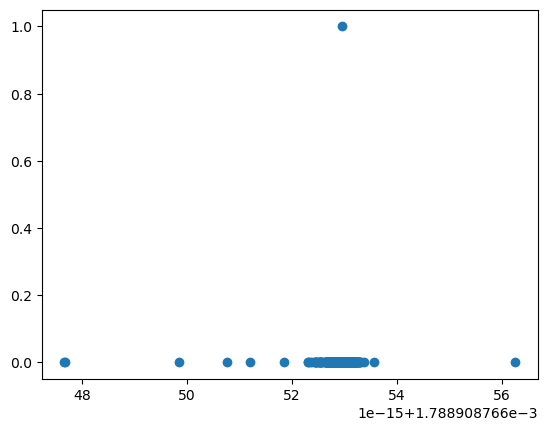

In [236]:
import matplotlib.pyplot as plt

# Plot the scatter plot
plt.scatter(Y_pred_reshaped, Y_test_encoded)
plt.show()
